In [84]:
from vega_datasets import data
import matplotlib.pyplot as plt
import pandas as pd

# DATASET: SanFrancisco Temperatures

In [85]:
temps = data.sf_temps()

###    Resample by the day and take the average temperature. Visualize the average temperature over time.


In [86]:
temp_series = temps.set_index('date')

In [89]:
#Resampling with 'd' picks the [agg] of each day as the sampling point. 'Mean' is the aggregration made for
#each day.
daily_temp_avgs = temp_series.resample('d').agg('mean')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


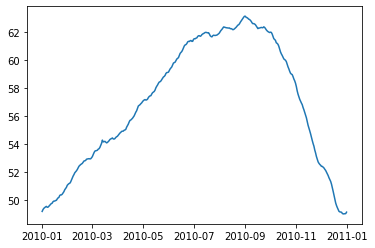

In [90]:
plt.plot(daily_temp_avgs)

###    Write the code necessary to visualize the minimum temperature over time.

In [ ]:
daily_low_temps = temp_series.resample('d').agg('min')

In [ ]:
#Making sure the first day is equal to what I found by resampling
temp_series['2010-01-01'].min()

In [ ]:
pyplot.plot(daily_low_temps)

###    Write the code necessary to visualize the maximum temperature over time.

In [ ]:
daily_high_temps = temp_series.resample('d').agg('max')

In [ ]:
#Plotting the high and low in the Series
pyplot.plot(daily_high_temps)
pyplot.plot(daily_low_temps)

In [ ]:
#####
plt.figure()

    Which month has the highest daily temperature variability?

Which month is the coldest, on average?

In [91]:
monthly_averages = temp_series.resample('m').mean()

In [92]:
min_temp = float(monthly_averages.min())

In [93]:
type(min_temp)

float

In [94]:
monthly_averages[monthly_averages == min_temp]

,temp
date,
2010-01-31,49.98414
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,NaN


In [95]:
#Just checkin'
temp_series['2010-01'].mean()

temp    49.98414
dtype: float64

Which month has the highest average temperature?

In [96]:
max_temp = float(monthly_averages.max())

In [97]:
monthly_averages[monthly_averages == max_temp]

,temp
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,62.487083


###    Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
    
    Use this resampled dataframe to calculate the change in temperature for the day. 

In [98]:
mins = temp_series.resample('d').agg('min')

In [99]:
maxs = temp_series.resample('d').agg('max')

In [100]:
frame = {'Daily Low':mins.values,'Daily High': maxs.values}

In [101]:
df = pd.DataFrame(temp_series.resample('d').agg('mean'))

In [102]:
df['Daily High'] = maxs

In [103]:
df['Daily Low'] = mins

In [104]:
df['Daily Change'] = df['Daily High'] - df['Daily Low']

In [105]:
df.tail()

,temp,Daily High,Daily Low,Daily Change
date,,,,
2010-12-27,48.991667,53.2,45.6,7.6
2010-12-28,49.000000,53.2,45.6,7.6
2010-12-29,49.012500,53.2,45.6,7.6
2010-12-30,49.012500,53.2,45.6,7.6
2010-12-31,49.116667,53.2,45.8,7.4


###    Which month has the highest daily temperature variability?

In [ ]:
(df['Daily Change'].resample('m').agg('mean'))

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

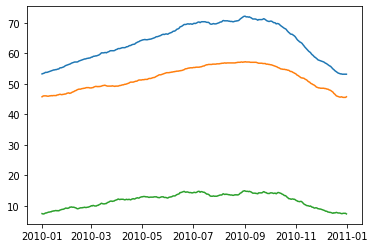

In [106]:
plt.plot(df['Daily High'])
plt.plot(df['Daily Low'])
plt.plot(df['Daily Change'])

# NEW DATASET: Seattle Weather

In [110]:
df = data.seattle_weather()
#Forgot to change the index to a datetime index. Now we're cookin'
df = df.set_index('date')

### Which year and month combination has the highest amount of precipitation?

In [111]:
monthly_rainfall = df.precipitation.resample('M').sum()

In [112]:
wettest_month = monthly_rainfall.max()

In [113]:
type(wettest_month)

numpy.float64

In [114]:
monthly_rainfall[monthly_rainfall == wettest_month]

date
2015-12-31    284.5
Freq: M, Name: precipitation, dtype: float64

###    Visualize the amount of monthly precipitation over time.

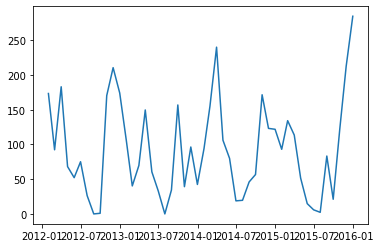

In [115]:
plt.plot(monthly_rainfall)

###    Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [117]:
df.wind.describe()

count    1461.000000
mean        3.241136
std         1.437825
min         0.400000
25%         2.200000
50%         3.000000
75%         4.000000
max         9.500000
Name: wind, dtype: float64

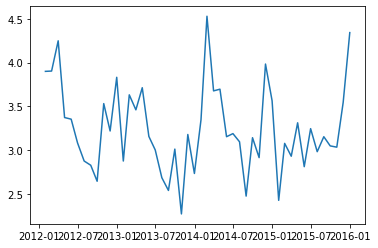

In [116]:
plt.plot(df.wind.resample('M').mean())

    Which year-month combination is the windiest?

In [118]:
df.wind.resample('M').mean().sort_values().tail()

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

    What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [ ]:
df.resample('Y').sum().sort_values('precipitation')
#Looks like 2013 had the least amount of rainfaail. Least amount of wind too

    In which month does it rain the most?


In [108]:
df.resample('M').mean().sort_values('precipitation', ascending=False).head()

KeyError: 'precipitation'


    Which month has the most number of days with a non-zero amount of precipitation?

In [ ]:
df.precipitation.resample('M').sum()

In [ ]:
#df.precipitation != 0

In [119]:
(df.loc['2015-11'].precipitation != 0).sum()

20

In [ ]:
df.index[0].month

In [122]:
#There is now a column with the month of the index.
df['month'] = df.index.month

In [ ]:
df.info()

In [ ]:
#Well I lost it. Try again later....
no_rain_days = {}
for index, row in df.iterrows(): 
    if row['precipitation'] == 0:
        no_rain_days[row['month']]:
    print(row['precipitation'], row['month']) 

In [120]:
no_rain_filter = df["precipitation"]!=0

In [123]:
df[no_rain_filter].groupby('month').count().sort_values('precipitation')

,precipitation,temp_max,temp_min,wind,weather
month,,,,,
7,11,11,11,11,11
8,22,22,22,22,22
5,34,34,34,34,34
9,35,35,35,35,35
6,37,37,37,37,37
4,59,59,59,59,59
10,61,61,61,61,61
1,66,66,66,66,66
11,71,71,71,71,71


# NEW DATASET: data.flights_20k()

In [17]:
flights_df = data.flights_20k()

In [18]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
date           20000 non-null datetime64[ns]
delay          20000 non-null int64
destination    20000 non-null object
distance       20000 non-null int64
origin         20000 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.3+ KB


    Convert any negative delays to 0.


In [19]:
#Didn't work so well. Let's try pandasWhere
#flights_df.delay.head()
flights_df['if_delay'] = flights_df.delay.where(flights_df.delay > 0, 0)

    Which hour of the day has the highest average delay?


In [20]:
#I forgot to set the index. It wasn't necessary for dealing with the integer value in the delay column.
flights_df = flights_df.set_index('date')

    Does the day of the week make a difference in the delay amount?

In [124]:
flights_df['day_of_week'] = flights_df.index.strftime("%w-%a")

In [125]:
flights_df.groupby('day_of_week').sum().sort_values('delay')

,delay,distance,if_delay,month
day_of_week,,,,
1-Mon,10716,1504996,21354,5854
6-Sat,10936,1290733,19755,4850
2-Tue,18256,1460784,27715,5678
0-Sun,18965,1327880,27221,5219
3-Wed,25129,1542607,33969,5982
4-Thu,30850,1460862,38605,6286
5-Fri,47220,1517386,53770,6307


Friday look to have the most amount of delay, by any measurement

In [38]:
#If I have time, try to do this again using Series operations. That .dt.dayofweek. Or even .resample()
delays = flights_df.if_delay

    Does the month make a difference in the delay amount?

In [126]:
flights_df['month'] = flights_df.index.strftime('%b')

In [127]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-13 14:56:00 to 2001-03-14 11:33:00
Data columns (total 7 columns):
delay          20000 non-null int64
destination    20000 non-null object
distance       20000 non-null int64
origin         20000 non-null object
if_delay       20000 non-null int64
day_of_week    20000 non-null object
month          20000 non-null object
dtypes: int64(3), object(4)
memory usage: 1.8+ MB


In [128]:
flights_df.groupby('month').sum()

,delay,distance,if_delay
month,,,
Feb,58796,3197793,76987
Jan,55918,3394659,76670
Mar,47358,3512796,68732


In [52]:
#flights_df.groupby('month').flights_df['delay','if_delay'].sum()

In [129]:
flights_df.groupby('month')['delay','if_delay'].sum()

,delay,if_delay
month,,
Feb,58796,76987
Jan,55918,76670
Mar,47358,68732


In [70]:
flights_df.groupby('month').first()
flights_df.groupby('month').last()

,delay,destination,distance,origin,if_delay,day_of_week
month,,,,,,
1,-6,MCI,1489,SEA,0,4
2,42,BNA,443,RDU,42,5
3,0,PHX,328,ABQ,0,2


In [57]:
flights_df.groupby('month')['delay','if_delay'].count()

,delay,if_delay
month,,
1,6784,6784
2,6256,6256
3,6960,6960


In [131]:
flights_df.groupby('month')['delay','if_delay']

In [130]:
flights_df.groupby('month')['delay','if_delay'].count()/flights_df.groupby('month')['delay','if_delay'].sum()

,delay,if_delay
month,,
Feb,0.106402,0.081260
Jan,0.121321,0.088483
Mar,0.146966,0.101263


# NEW DATASET: Iowa Electricity

In [73]:
iowa_df = data.iowa_electricity()

In [75]:
iowa_df = iowa_df.set_index('year')


    Lineplot of generation over time, color by source
    Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
    Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
    Is the total generation increasing over time?
        How would you control for increasing consumption over time when considering how much energy is coming from each source?
        express each number as a % of the year's total


    For each row, calculate the percentage of the year's total that energy source provided.


In [78]:
iowa_df.columns

Index(['source', 'net_generation'], dtype='object')

In [79]:
iowa_df.groupby('source').sum()

,net_generation
source,
Fossil Fuels,620129
Nuclear Energy,80103
Renewables,164220


In [83]:
#This is the total for the 2001 year. Each source will be a fraction of that.
iowa_df['2001-01-01'].net_generation.sum()

40651

In [135]:
iowa_df

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883
2006-01-01,Fossil Fuels,37014
2007-01-01,Fossil Fuels,41389
2008-01-01,Fossil Fuels,42734
2009-01-01,Fossil Fuels,38620


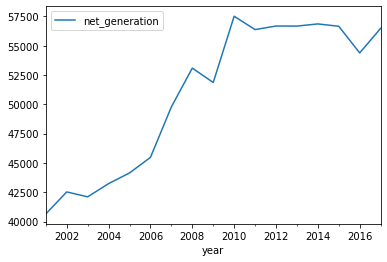

In [139]:
iowa_df.resample('Y').sum().plot()

In [140]:
import seaborn as sns

In [ ]:
sns.lineplot(data=iowa_df, )

In [ ]:
#PIVOT, the reverse of pd.melt()


In [143]:
#Values, rows, columns
iowa_df.pivot_table('net_generation','year','source')

source,Fossil Fuels,Nuclear Energy,Renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724
2006-01-01,37014,5095,3364
2007-01-01,41389,4519,3870
2008-01-01,42734,5282,5070
2009-01-01,38620,4679,8560


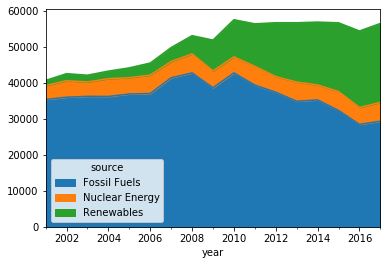

In [144]:
iowa_df.pivot_table('net_generation','year','source').plot.area()

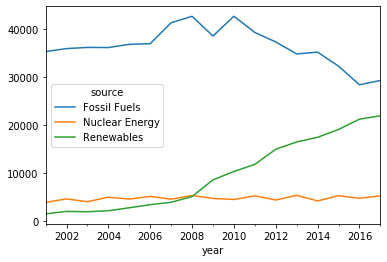

In [145]:
iowa_df.pivot_table('net_generation','year','source').plot()